# Progetto di Data Manipulation and Visualization

In [7]:
import pandas as pd
import numpy as np

In [1]:
import kaggle
import os

In [9]:
# Percorso di salvataggio (default nella cartella corrente)
dataset_path = '.'  # I file saranno salvati nella stessa cartella dello script


# Scaricare il dataset "google-play-store-apps" e "google-play-store-user-reviews" da Kaggle
kaggle.api.dataset_download_files('lava18/google-play-store-apps', path=dataset_path, unzip=True)

# Caricamento dei file CSV nei DataFrame
df = pd.read_csv(os.path.join(dataset_path, 'googleplaystore.csv'))
Gr = pd.read_csv(os.path.join(dataset_path, 'googleplaystore_user_reviews.csv'))

Dataset URL: https://www.kaggle.com/datasets/lava18/google-play-store-apps


Prima di iniziare il Data cleaning, si osservano i due dataframe per comprenderne la struttura e il contenuto.

In [11]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [12]:
Gr

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


Il dataframe Gr (Googleplaystore Reviews) contiene record con valori Sentiment pari a NaN.  
Poiché non è possibile riempire questi valori mancanti e tali record risultano inutili per le analisi, si procede con la loro eliminazione.
Si selezionano ed eliminano le righe contenenti NaN nel subset del Sentiment.


In [17]:
Gr.dropna(subset=['Sentiment'], inplace=True)

Verifica

In [20]:
Gr

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


Si verifica la presenza di eventuali altri valori NaN nel dataframe.

In [23]:
# Selezionare le righe con NaN nella colonna 'Translated_Rewiew'
gr_nan = Gr[Gr['Translated_Review'].isna()]

# Mostrare le prime righe del dataframe filtrato
print(gr_nan.head())

                                             App Translated_Review Sentiment  \
268                                         11st               NaN   Neutral   
15048        Birds Sounds Ringtones & Wallpapers               NaN   Neutral   
22092             Calorie Counter - MyFitnessPal               NaN   Neutral   
31623                                  DC Comics               NaN   Neutral   
52500  Garden Photo Frames - Garden Photo Editor               NaN   Neutral   

       Sentiment_Polarity  Sentiment_Subjectivity  
268                   0.0                     0.0  
15048                 0.0                     0.0  
22092                 0.0                     0.0  
31623                 0.0                     0.0  
52500                 0.0                     0.0  


In [25]:
# Selezionare le righe con NaN nella colonna 'Translated_Rewiew'
gr_nan1 = Gr[Gr['Sentiment_Polarity'].isna()]

# Mostrare le prime righe del dataframe filtrato
print(gr_nan1.head())

Empty DataFrame
Columns: [App, Translated_Review, Sentiment, Sentiment_Polarity, Sentiment_Subjectivity]
Index: []


In [27]:
# Selezionare le righe con NaN nella colonna 'Translated_Rewiew'
gr_nan2 = Gr[Gr['Sentiment_Subjectivity'].isna()]

# Mostrare le prime righe del dataframe filtrato
print(gr_nan2.head())

Empty DataFrame
Columns: [App, Translated_Review, Sentiment, Sentiment_Polarity, Sentiment_Subjectivity]
Index: []


I record con Recensioni assenti hanno comunque validità, dal momento che esiste il sentiment Neutral.  
Per cui,  **il dataframe Gr è ripulito**

#### Pulizia Dataframe 'df'

Prima di procedere, è necessario ottenere una panoramica del dataframe.

In [32]:
df.shape

(10841, 13)

In [34]:
df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [36]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Dall'analisi dei tre output, si possono fare le seguenti osservazioni:  
**1)** Il numero unico di App (nunique) è 9660, mentre i record totali sono 10.841, il che indica la presenza di duplicati     
**2)** Il campo Type dovrebbe contenere solo i valori Free e Paid, ma presenta tre valori unici, segnalando un possibile errore.     
**3)** Alcuni tipi di dato sono errati:  
Review ed Installs dovrebbero essere trattati da interi,e Last Updated come un datetime.

In [39]:
# Conversione dei valori in numeri, sostituendo quelli non convertibili con NaN, e sostituendo i Nan in 0
df["Reviews"] = pd.to_numeric(df["Reviews"], errors="coerce").fillna(0).astype(int)

In [41]:
df["Type"].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

Si estraggono i record in cui il campo Type è NaN oppure ha valore 0.

In [44]:
df[df["Type"].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


Dal momento che Price è 0, si puù sostituire Nan con Free

In [47]:
df["Type"].fillna("Free", inplace=True)

In [49]:
#Type = 0
df[df["Type"] == '0']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,0,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


I valori sono sfarsati.  
**Si procede con la correzione della categoria del record.**    
Si verifica tra le categorie disponibili se è presente quella corretta,  
che dovrebbe essere Photography in base al nome dell'app

In [52]:
df["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

PHOTOGRAPHY è la categoria.   
Si procede con l'analisi dei generi che rientrano in questa categoria

In [55]:
photography_genres = df[df["Category"] == "PHOTOGRAPHY"]["Genres"].unique()
print(photography_genres)

['Photography']


Solo un genere appartiene a questa categoria.   
Si aggiornano i valori della categoria e del tipo nel record, assicurandosi che tutti gli altri campi siano allineati correttamente

In [58]:
# Vengono filtrati solo le app di fotografia e viene creara una copia del dataset ((df_photography).
df_photography = df[df["Category"] == "PHOTOGRAPHY"].copy()
#Modifica della colonna "Size" solo in df_photography, trasformando i valori numerici e rimuovendo la "M".
df_photography["Size"] = pd.to_numeric(df_photography["Size"].str.replace("M", "", regex=True), errors="coerce")

# Calcolo della media ignorando i NaN
media_size_photography = df_photography["Size"].mean()

# Se la media esiste, la arrotonda e aggiunge "M"
if not pd.isna(media_size_photography):
    media_size_photography = f"{round(media_size_photography, 1)}M"
else:
    media_size_photography = "Varies with device"

#Perchè questa operazione?
#Perchè, osservando il record sfarsato, nessun valore è riconducibile al Size. Per cui si usa la media della categoria

# Aggiornamento  dei valori dell'app specificata
df.loc[df["App"] == "Life Made WI-Fi Touchscreen Photo Frame", 
       ["Category", "Rating", "Reviews", "Size", "Installs", "Type", "Price", 
        "Content Rating", "Genres", "Last Updated", "Current Ver", "Android Ver"]] = [
    "PHOTOGRAPHY", 1.9, 19, media_size_photography, "1,000+", "Free", 0, 
    "Everyone", "Photography", "February 11, 2018", "1.0.19", "4.0 and up"
]

In [60]:
df[df["App"] == "Life Made WI-Fi Touchscreen Photo Frame"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,PHOTOGRAPHY,1.9,19,17.6M,"1,000+",Free,0,Everyone,Photography,"February 11, 2018",1.0.19,4.0 and up


Conversione delle altre colonne in valori numerici

In [63]:
# La colonna Installs ha dei + nei vari record. Si eliminano e si convertono i valori in interi
df["Installs"] = df["Installs"].str.replace("[+,]", "", regex=True).astype(int).astype("Int64")

In [65]:
# La colonna Price ha il simbolo $. Per eliminarli, convertire i valori in stringhe
df['Price'] = df['Price'].astype(str).str.replace(r'[\$,]', '', regex=True)

In [67]:
# Per mantenere esplicativi i dati di prezzo, si rinomina la colonna Price con il simbolo $  
df.rename(columns={'Price': 'Price ($)'}, inplace=True)

In [69]:
# Conversione in numeri
df['Price ($)'] = pd.to_numeric(df['Price ($)'], errors='coerce')

In [71]:
# Conversione di Last Updated in Datetime, ignorando gli errori e forzando la conversione dove necessario
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

In [73]:
print(df.dtypes)


App                       object
Category                  object
Rating                   float64
Reviews                    int32
Size                      object
Installs                   Int64
Type                      object
Price ($)                float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object


# Eliminazione duplicati e valori nulli

In [76]:
# Analisi dei duplicati: Visualizzare il numero di duplicati nel dataframe
duplicati = df.duplicated().sum()  # Numero di duplicati
print(f'Numero di righe duplicate nel dataframe: {duplicati}')


# Visualizzare i valori mancanti (null) nel dataset
missing_values = df.isnull().sum()  # Calcola i valori nulli per ogni colonna
missing_percentage = (df.isnull().mean() * 100)  # Calcola la percentuale di valori nulli per ogni colonna

# Creazione DataFrame con i valori mancanti e le percentuali
missing_data = pd.DataFrame({
    'Valori mancanti': missing_values,
    'Percentuale': missing_percentage
})

# Mostra i valori mancanti per ogni colonna
print("\nValori mancanti nel dataset (assoluti e percentuali):")
print(missing_data)

# Analisi dei duplicati nel secondo dataframe
duplicati_gr = Gr.duplicated().sum()
print(f'\nNumero di righe duplicate nel secondo dataframe: {duplicati_gr}')

# 4. Visualizzare i valori mancanti nel secondo dataframe
missing_values_gr = Gr.isnull().sum()
missing_percentage_gr = (Gr.isnull().mean() * 100)

missing_data_gr = pd.DataFrame({
    'Valori mancanti': missing_values_gr,
    'Percentuale': missing_percentage_gr
})

print("\nValori mancanti nel secondo dataset (assoluti e percentuali):")
print(missing_data_gr)

Numero di righe duplicate nel dataframe: 483

Valori mancanti nel dataset (assoluti e percentuali):
                Valori mancanti  Percentuale
App                           0     0.000000
Category                      0     0.000000
Rating                     1474    13.596532
Reviews                       0     0.000000
Size                          0     0.000000
Installs                      0     0.000000
Type                          0     0.000000
Price ($)                     0     0.000000
Content Rating                0     0.000000
Genres                        0     0.000000
Last Updated                  0     0.000000
Current Ver                   8     0.073794
Android Ver                   2     0.018448

Numero di righe duplicate nel secondo dataframe: 7735

Valori mancanti nel secondo dataset (assoluti e percentuali):
                        Valori mancanti  Percentuale
App                                   0     0.000000
Translated_Review                     5     0.

Per gestire la presenza di valori duplicati all'interno del dataset in modo efficiente,  
è possibile utilizzare il metodo drop_duplicates() per rimuovere le righe duplicate in blocco, senza la necessità di trattare ogni singolo caso separatamente. 

In [79]:
df = df.drop_duplicates()
Gr = Gr.drop_duplicates()

# Trattamento valori nulli

In [82]:
df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 0
Price ($)            0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

Per trattare i valori nulli in Rating, si osserva lo stato per ogni categoria.

In [85]:
Status_categoria = df.groupby("Category").agg(
    totale_app=("App", "count"),  # Conta il numero totale di app per categoria
    nan_ratings=("Rating", lambda x: x.isna().sum()),  # Conta i NaN nei rating
    rating_std=("Rating", "std")  # Calcola la deviazione standard dei rating
)

print(Status_categoria)

                     totale_app  nan_ratings  rating_std
Category                                                
ART_AND_DESIGN               65            3    0.358297
AUTO_AND_VEHICLES            85           12    0.543692
BEAUTY                       53           11    0.362603
BOOKS_AND_REFERENCE         230           53    0.429861
BUSINESS                    427          157    0.652214
COMICS                       60            2    0.537758
COMMUNICATION               366           59    0.438383
DATING                      196           37    0.621058
EDUCATION                   130            1    0.260341
ENTERTAINMENT               111            0    0.321019
EVENTS                       64           19    0.419499
FAMILY                     1943          225    0.511217
FINANCE                     360           43    0.647026
FOOD_AND_DRINK              124           18    0.549665
GAME                       1121           47    0.367117
HEALTH_AND_FITNESS          306

Osservando attentamente questa tabella, risulta che in ogni categoria il numero di NaN è più basso rispetto al numero totale di app.  
Inoltre, in relazione al numero di app, la deviazione standard è trascurabile.

**Si possono sostituire i Nan con la media dei Rating della categoria di appartenenza**



In [90]:
# Calcolare la media dei rating per ogni categoria e applicarla as ogni riga
df.loc[:, "Rating"] = df["Rating"].fillna(df.groupby("Category")["Rating"].transform("mean"))

In [92]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price ($)         0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10358 non-null  object        
 1   Category        10358 non-null  object        
 2   Rating          10358 non-null  float64       
 3   Reviews         10358 non-null  int32         
 4   Size            10358 non-null  object        
 5   Installs        10358 non-null  Int64         
 6   Type            10358 non-null  object        
 7   Price ($)       10358 non-null  float64       
 8   Content Rating  10358 non-null  object        
 9   Genres          10358 non-null  object        
 10  Last Updated    10358 non-null  datetime64[ns]
 11  Current Ver     10350 non-null  object        
 12  Android Ver     10356 non-null  object        
dtypes: Int64(1), datetime64[ns](1), float64(2), int32(1), object(8)
memory usage: 1.1+ MB


  Il numero di Nan nelle colonne di Versione è irrilevante.  
  I datatype sono tutti corretti

### Possiamo procedere con l'analisi

#### Correlazioni

In [122]:
# Calcolare la correlazione di Spearman tra 'Installs' e 'Reviews'
spearman_corr = df[['Installs', 'Reviews']].corr(method='spearman')

# Visualizzare il risultato
print(spearman_corr)

          Installs   Reviews
Installs  1.000000  0.970704
Reviews   0.970704  1.000000


La correlazione di Spearman tra 'Installs' e 'Reviews' è 0.97, che indica una relazione monotona molto forte.  
Ciò significa che le app con un numero maggiore di installazioni tendono anche ad avere più recensioni.   
Tuttavia, è importante sottolineare che la correlazione non implica causalità: un numero maggiore di installazioni
non causa direttamente più recensioni, ma le due variabili si muovono insieme in modo consistente.  
La correlazione di Spearman è stata scelta perché la relazione tra le variabili potrebbe non essere strettamente lineare.

# Analisi di mercato
#### Categoria

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

##### Quali categorie dominano il mercato?
Per rispondere a questa domanda, si analizzano le categorie, il numero di installazioni, la percentuale di app gratis ed altri aspetti.

**Le categorie per numero di istallazioni, e percentuale di app a pagamento e gratis**

In [107]:
# Calcolare il numero totale di installazioni per categoria
category_installs = df.groupby('Category')['Installs'].sum().reset_index()
category_installs = category_installs.sort_values(by='Installs', ascending=False)

# Calcolare la percentuale di app gratuite e a pagamento per categoria
def free_paid_percentage(group):
    """
    Calcola la percentuale di app gratuite e a pagamento per una categoria.

    Args:
        group (DataFrame): Un DataFrame contenente le informazioni delle app per una singola categoria.

    Returns:
        pd.Series: Una serie contenente le percentuali di app gratuite e a pagamento con le chiavi 
                   'Free %' e 'Paid %'.
    """
    total = len(group)
    free = len(group[group['Type'] == 'Free']) / total * 100
    paid = len(group[group['Type'] == 'Paid']) / total * 100
    return pd.Series({'Free %': free, 'Paid %': paid})

category_prices = df.groupby('Category').apply(free_paid_percentage).reset_index()

# Unire i due dataframe per avere una tabella completa
final_table = category_installs.merge(category_prices, on='Category')

# Mostrare la tabella finale
print(final_table)


               Category     Installs      Free %     Paid %
0                  GAME  31544024415   92.595897   7.404103
1         COMMUNICATION  24152276251   92.622951   7.377049
2                SOCIAL  12513867902   98.928571   1.071429
3          PRODUCTIVITY  12463091369   93.120393   6.879607
4                 TOOLS  11452771915   90.747331   9.252669
5                FAMILY  10041692505   90.375708   9.624292
6           PHOTOGRAPHY   9721248655   93.808050   6.191950
7      TRAVEL_AND_LOCAL   6361887146   94.936709   5.063291
8         VIDEO_PLAYERS   6222002720   97.714286   2.285714
9    NEWS_AND_MAGAZINES   5393217760   99.242424   0.757576
10             SHOPPING   2573348785   99.107143   0.892857
11        ENTERTAINMENT   2455660000   98.198198   1.801802
12      PERSONALIZATION   2074494782   78.865979  21.134021
13  BOOKS_AND_REFERENCE   1916469576   87.826087  12.173913
14               SPORTS   1528574498   93.162393   6.837607
15   HEALTH_AND_FITNESS   1361022512   9

Questa tabella fornisce una panoramica iniziale sulle categorie di app,   
ordinata in base al numero totale di installazioni.   
Per ciascuna categoria, sono riportate anche le percentuali di app gratuite e a pagamento.  
Si osserva che, in termini percentuali, **la presenza di app a pagamento è significativamente inferiore,** superando il 10% del totale in soli quattro casi.

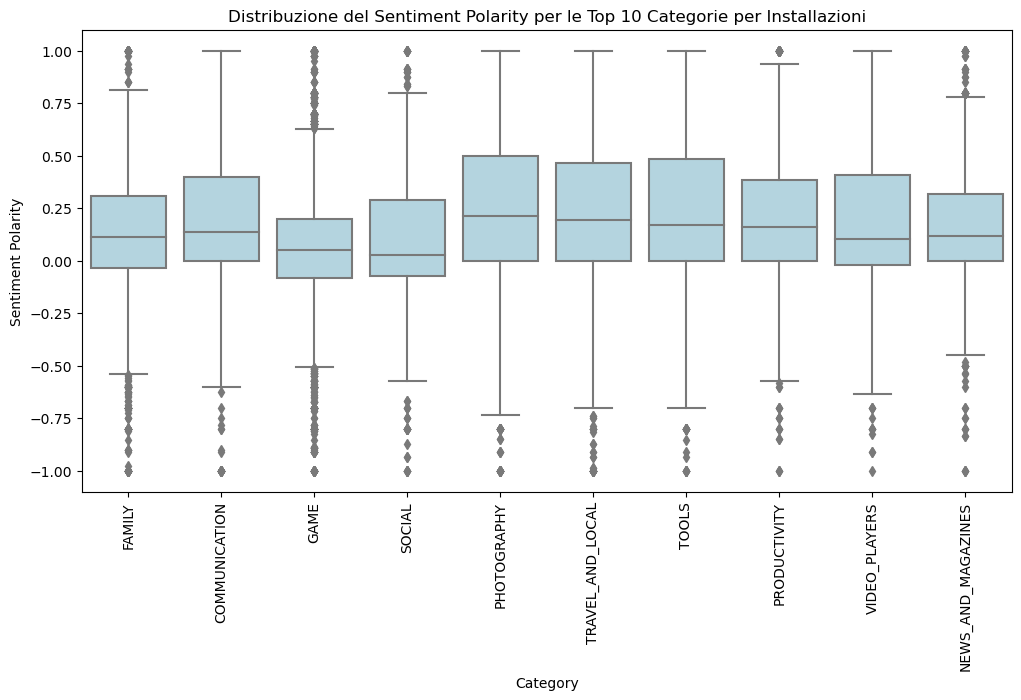

In [110]:
# Trovare le prime 10 categorie per numero totale di installazioni
top_10_categories = df.groupby('Category')['Installs'].sum().nlargest(10).index

# Unione dei dataframe sulla colonna 'App'
merged_df = pd.merge(df, Gr, on='App')

# Filtrare per le categorie con più installazioni
filtered_df = merged_df[merged_df['Category'].isin(top_10_categories)]

# Creazione del boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='Category', y='Sentiment_Polarity', color='lightblue')
plt.xticks(rotation=90)
plt.title('Distribuzione del Sentiment Polarity per le Top 10 Categorie per Installazioni')
plt.xlabel('Category')
plt.ylabel('Sentiment Polarity')
plt.show()


I boxplot delle diverse categorie di app mostrano che la mediana del **Sentiment Polarity** tende ad essere simile tra le categorie, indicando che il sentimento medio delle recensioni non presenta differenze sostanziali tra di esse. Questo suggerisce che, in generale, le app in tutte le categorie tendono a suscitare reazioni simili nei recensori.

Tuttavia, per la categoria GAME si osserva un numero maggiore di **outlier**, sia sopra che sotto la mediana. La presenza di questi outlier indica che, all'interno di questa categoria, ci sono alcune app che ricevono recensioni con sentimenti estremi, sia molto positivi che molto negativi.  
Questo può significare diverse cose:

**Polarizzazione delle opinioni** – I giochi tendono a suscitare emozioni forti nei giocatori: alcune persone li amano, altre li odiano. Questo spiega la presenza di molti outlier positivi (recensioni entusiaste) e negativi (recensioni molto critiche).

**Esperienze diverse tra gli utenti** – I giochi possono variare molto in qualità, con alcuni che funzionano perfettamente e altri che hanno problemi tecnici, portando a recensioni estreme.

**Aspettative elevate** – Gli utenti dei giochi possono avere aspettative più alte rispetto ad altre app. Se un gioco non soddisfa le aspettative, potrebbe ricevere recensioni molto negative; viceversa, se è particolarmente coinvolgente, può generare entusiasmo e recensioni molto positive.

In sintesi, la categoria GAME genera reazioni più estreme rispetto alle altre, con utenti molto soddisfatti o molto delusi.  
In maniera più ridotta, anche la categoria News And Magazine

# Genere

Secondo la descrizione della colonna su Kaggle, un'app può appartenere a più generi.

Si deve  dunque considerare il fatto che un'app può essere classificata sotto più generi contemporaneamente (es. "Musica", "Gioco", "Famiglia" per una app musicale per famiglie).

Il codice seguente dovrà gestire correttamente queste combinazioni di generi e assegnare una categoria per ogni genere, basandosi sulla categoria predominante per quel genere.

In [115]:
#Unione dei due dataframe
merged_df = pd.merge(df, Gr, on='App')

# Creazione di un nuovo dataframe espandendo i generi per app
expanded_df = merged_df.assign(Genres=merged_df['Genres'].str.split(';')).explode('Genres')

# Creazione di una lista per aggiungere il genere e la categoria di appartenenza per ogni genere
genres_with_categories = []

# Ciclizzazione attraverso tutti i generi unici nel dataframe espanso
for genre in expanded_df['Genres'].unique():
    # Identificazione delle categorie associate al genere
    categories = expanded_df[expanded_df['Genres'] == genre]['Category'].unique()
    
    # Se il genere ha più di una categoria, si considera quella più frequente
    if len(categories) > 1:
        category = expanded_df[expanded_df['Genres'] == genre]['Category'].mode()[0]
    else:
        category = categories[0]
    
    # Aggiunta del genere e la categoria alla lista
    genres_with_categories.append((genre, category))

# Creazione di un dataframe con il risultato
genres_categories_df = pd.DataFrame(genres_with_categories, columns=['Genre', 'Category'])

# Ordinamento dei risultati per genere (opzionale)
genres_categories_df = genres_categories_df.sort_values(by='Genre')

# Visualizzazione del dataframe
print(genres_categories_df)

                      Genre             Category
24                   Action                 GAME
31       Action & Adventure               FAMILY
29                Adventure                 GAME
22                   Arcade                 GAME
0              Art & Design       ART_AND_DESIGN
3           Auto & Vehicles    AUTO_AND_VEHICLES
4                    Beauty               BEAUTY
27                    Board                 GAME
5         Books & Reference  BOOKS_AND_REFERENCE
21              Brain Games               FAMILY
6                  Business             BUSINESS
19                   Casual                 GAME
8                    Comics               COMICS
7             Communication        COMMUNICATION
2                Creativity               FAMILY
9                    Dating               DATING
10                Education            EDUCATION
32              Educational               FAMILY
11            Entertainment        ENTERTAINMENT
12                  

La funzione str.split(';') divide i generi se un'app ne ha più di uno (ad esempio, un gioco musicale per famiglie che appartiene a "Musica", "Gioco", "Famiglia"). La funzione explode('Genres') crea una nuova riga per ogni genere, quindi ogni genere sarà trattato separatamente.

Dopo aver espanso i generi, il codice associa ogni genere alla categoria predominante utilizzando il metodo .mode()[0] per ottenere la categoria più frequente. Se un genere ha una sola categoria, quella viene automaticamente associata.

Il risultato finale è una tabella che mostra ogni genere e la sua categoria

Nel prossimo output verrano mostrati i generi più popolari (utilizzando expanded_df), scrivendo tra parentesi la categoria di appartenenza

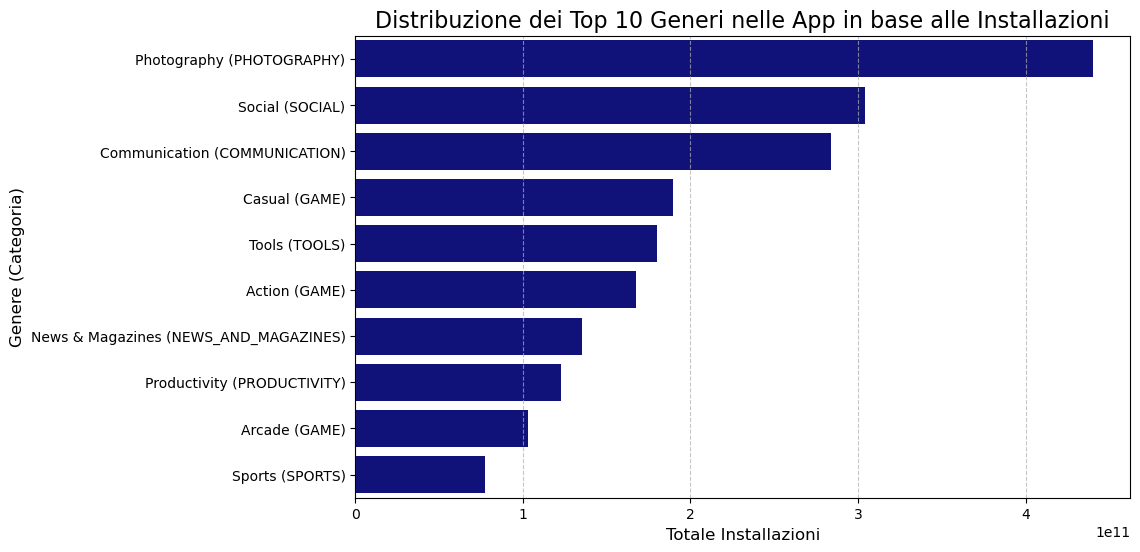

In [119]:
# Somma delle installazioni per ciascun genere
installations_by_genre = expanded_df.groupby('Genres')['Installs'].sum().sort_values(ascending=False)

# Selezione dei primi 10 generi in base alle installazioni
top_10_genres = installations_by_genre.head(10)

# Creazione di una lista per aggiungere la categoria di appartenenza tra parentesi
top_10_genres_with_category = []

# Aggiunta della categoria tra parentesi per ogni genere
for genre in top_10_genres.index:
    # Identificazione della categoria predominante per ciascun genere
    categories = expanded_df[expanded_df['Genres'] == genre]['Category'].unique()
    if len(categories) > 1:
        category = expanded_df[expanded_df['Genres'] == genre]['Category'].mode()[0]
    else:
        category = categories[0]
    
    # Aggiunta del genere e la categoria alla lista
    top_10_genres_with_category.append(f"{genre} ({category})")

# Creazione del barplot orizzontale
plt.figure(figsize=(10, 6)) 
sns.barplot(y=top_10_genres_with_category, x=top_10_genres.values, color='darkblue', orient='h')

# Titolo e le etichette
plt.title("Distribuzione dei Top 10 Generi nelle App in base alle Installazioni", fontsize=16)
plt.xlabel("Totale Installazioni", fontsize=12)
plt.ylabel("Genere (Categoria)", fontsize=12)

# Griglia
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()



La categoria "Game" risulta essere la più popolare, come evidenziato dalla frequente presenza della stringa "Game" tra le parentesi.    
Ma a livello di **genere**, le applicazioni più popolari appartengono alle categorie della fotografia e della comunicazione.

**Quali elementi fanno la differenza nella valutazione degli utenti?**  
Per avere una panoramica esaustiva su questi 10 generi, e capire quali elementi condizionano la valutazione degli utenti, si estrapolano le stringhe delle recensioni.

Con il prossimo codice, si estraggono 2 commenti positivi e 2 negativi (a caso) per ognuno di questi 10 generi.

In [124]:
# Impostare Pandas così da mostrare l'intero contenuto della colonna 'Translated_Review'
pd.set_option('display.max_colwidth', None)

# Supponiamo che 'top_10_genres_with_category' sia una lista di generi
top_10_genres_with_category = [
    'Photography', 'Communication', 'Casual', 'Social', 'News & Magazines',
    'Tools', 'Action', 'Productivity', 'Arcade', 'Education'
]

# Filtramo il dataframe Gr per ottenere solo le app che appartengono ai generi specificati
app_in_top_genres = df[df['Genres'].isin(top_10_genres_with_category)]['App']
gr_filtrato = Gr[Gr['App'].isin(app_in_top_genres)].copy()  # Creiamo una copia per evitare il warning

# Aggiungiamo una colonna che determina se il commento è positivo, negativo o neutrale
gr_filtrato['Sentiment_Type'] = gr_filtrato['Sentiment_Polarity'].apply(
    lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral'
)

# Dizionario per memorizzare i commenti per ciascun genere
commenti_per_genere = {}

# Estraimo 2 commenti positivi e 2 negativi per ogni genere
for genere in top_10_genres_with_category:
    # Filtra le app appartenenti al genere specifico
    apps_in_genere = df[df['Genres'] == genere]['App']
    gr_genere = gr_filtrato[gr_filtrato['App'].isin(apps_in_genere)]
    
    # Separiamo i commenti positivi e negativi
    commenti_positivi = gr_genere[gr_genere['Sentiment_Type'] == 'positive'].head(2)
    commenti_negativi = gr_genere[gr_genere['Sentiment_Type'] == 'negative'].head(2)
    
    # Salviamo i commenti nel dizionario
    commenti_per_genere[genere] = {
        'Positive_Comments': commenti_positivi[['App', 'Translated_Review']],
        'Negative_Comments': commenti_negativi[['App', 'Translated_Review']],
    }

# Visualizziamo i risultati
for genere, commenti in commenti_per_genere.items():
    print(f"Genere: {genere}")
    print("Positivi:")
    print(commenti['Positive_Comments'])
    print("Negativi:")
    print(commenti['Negative_Comments'])
    print("\n")

Genere: Photography
Positivi:
                               App  \
2181  A+ Gallery - Photos & Videos   
2189  A+ Gallery - Photos & Videos   

                                                                                                                                                                                                               Translated_Review  
2181  The good. But I 2 problems 1. I cannot remove album cover set. I change another picture. Please fix this. 2. When selecting pics right column, scroll bar gets activated tone. This irritating since scroll way back were.  
2189                                                                                                                                                                                           I love much better gallery apps..  
Negativi:
                               App  \
2180  A+ Gallery - Photos & Videos   
2182  A+ Gallery - Photos & Videos   

                                                 

Dopo aver analizzato i commenti di diverse app suddivisi per genere, possiamo trarre diverse conclusioni generali e considerazioni utili per sviluppare una nuova app.
### Cosa penalizza la valutazione di un app?
**Crash continui e lentezza di esecuzione:** Molti commenti evidenziano problemi di stabilità delle app, come nel caso di giochi o app di produttività che smettono di funzionare dopo un aggiornamento o diventano più lente. È importante assicurarsi che le app siano stabili e ben ottimizzate per evitare frustrazione negli utenti. 
 
**Problemi con gli aggiornamenti:** Alcuni utenti menzionano che dopo gli aggiornamenti le app smettono di funzionare correttamente, come nel caso di "Angry Birds 2". Questo suggerisce che è essenziale fare test approfonditi prima di rilasciare un aggiornamento.  


**Difficoltà nell’utilizzo ed interfaccia poco chiara:** Molti utenti segnalano difficoltà con l’interfaccia utente, come nel caso di app di salute o social che hanno un'interfaccia confusa o non intuitiva.
Bisogna prestare attenzione al design.  

**Ads:** Diversi commenti negativi fanno riferimento agli annunci invasivi o fastidiosi, che possono danneggiare l’esperienza dell'utente. 
La pubblicità non deve essere troppo invasiva.


**Mancanza di funzionalità:** Gli utenti spesso vogliono più personalizzazione la possibilità di personalizzare le app o di aggiungere nuove caratteristiche. Ad esempio, alcuni commenti negativi nelle app di Fotografia menzionano che funzionalità essenziali, come la possibilità di eliminare album o foto, non sono più disponibili o non funzionano come dovrebbero dopo gli aggiornamenti

**Valutazione della qualità:** Le app di comunicazione o musica potrebbero essere criticate per la qualità scarsa delle chiamate o della connessione (ad esempio, per 2ndLine - Second Phone Number, la recensione recita "non capisco cosa dicono, la connessione è pessima"). Assicurarsi che la qualità audio e video sia di livello è cruciale per app come quelle di social media o comunicazione.

### Che cosa migliora la valutazione?

**Funzionalità gratuite:** Le app che offrono funzionalità gratuite come nel caso di "Angry Birds 2", dove gli utenti apprezzano la possibilità di guardare video gratuiti per ottenere vantaggi, possono migliorare il coinvolgimento dell'utente.  

**Aggiornamenti regolari:** Molte app vengono ritenute obsolete quando non vengono aggiornate regolarmente, come nel caso della "7 Day Food Journal Challenge" che è stata abbandonata senza aggiornamenti per un anno.

**Importanza della gestione degli errori e delle prestazioni:** Gli utenti segnalano frustrazione quando le app non gestiscono correttamente gli errori (ad esempio, app che si chiudono improvvisamente o che non rispondono correttamente ai comandi dell'utente). La gestione degli errori e l'implementazione di un sistema di feedback chiaro sono essenziali.   
**Supporto utenti:** Alcuni utenti si lamentano di non ricevere supporto rapido per risolvere problemi. È fondamentale avere un supporto clienti efficiente che risolva rapidamente eventuali problematiche.

# App Gratis VS App a pagamento.
### Quale effetto sul rating?

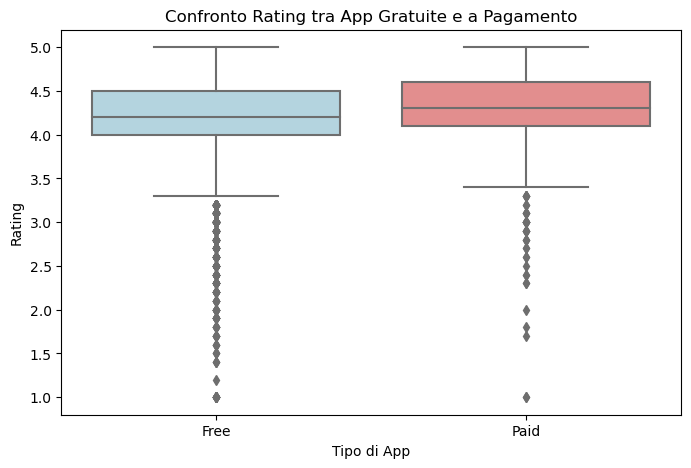

In [128]:
# Creazione del boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Type', y='Rating', palette=['lightblue', 'lightcoral'])

plt.title('Confronto Rating tra App Gratuite e a Pagamento')
plt.xlabel('Tipo di App')
plt.ylabel('Rating')
plt.show()

#### La variabilità della distribuzione del Rating è simile per entrambe le categorie (Free e Paid).
Le app Paid hanno un punteggio leggermente più alto rispetto a quelle Free.
La fitta presenza di outlier nelle App free significa hanno più valutazioni molto basse rispetto a quelle a pagamento.

Ciò suggerisce che le app a pagamento potrebbero offrire un’esperienza più stabile e soddisfacente, mentre quelle gratuite possono variare molto in qualità.

**Quale effetto sul sentiment?**

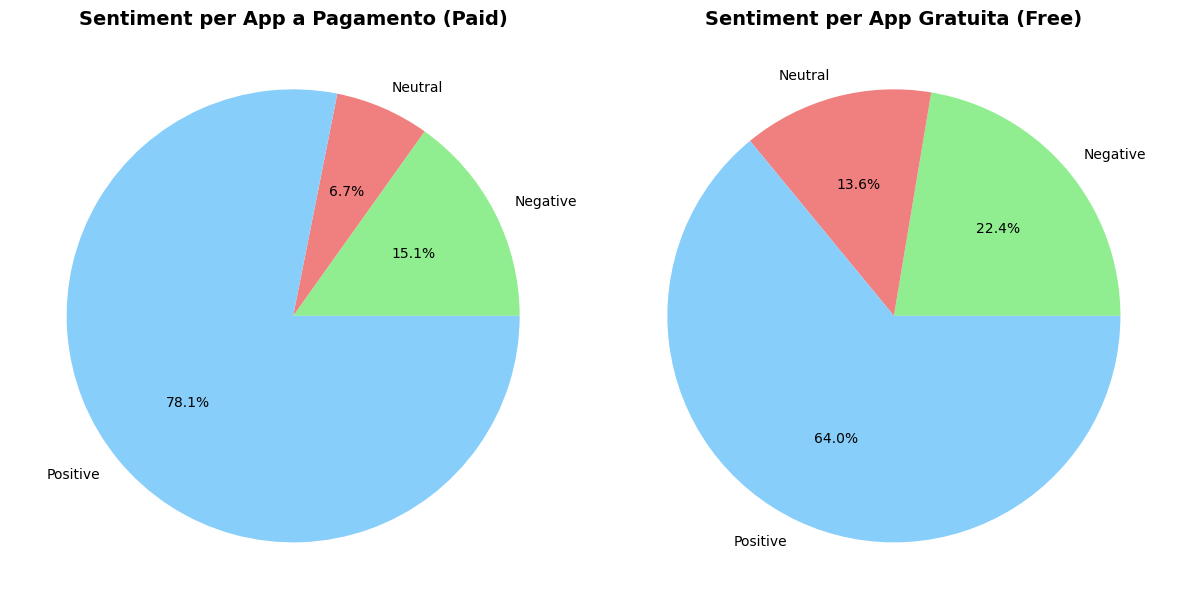

In [132]:
# Calcolo della percentuale di ciascun tipo di sentiment per ciascun tipo di app (Paid vs Free)
sentiment_percentage = merged_df.groupby(['Type', 'Sentiment']).size().unstack(fill_value=0)
sentiment_percentage = sentiment_percentage.apply(lambda x: x / x.sum() * 100, axis=1)

# Separazione dei dati per Paid e Free
paid_sentiment = sentiment_percentage.loc['Paid']
free_sentiment = sentiment_percentage.loc['Free']

# Creazione di grafici a torta
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Ridotta la dimensione del grafico

# Grafico a torta per Paid
axes[0].pie(paid_sentiment, labels=paid_sentiment.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightskyblue'])
axes[0].set_title('Sentiment per App a Pagamento (Paid)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('', fontsize=12, fontweight='bold')  # Rimuoviamo etichetta asse Y e aggiungiamo in grassetto

# Grafico a torta per Free
axes[1].pie(free_sentiment, labels=free_sentiment.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightskyblue'])
axes[1].set_title('Sentiment per App Gratuita (Free)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('', fontsize=12, fontweight='bold')  # Rimuoviamo etichetta asse Y e aggiungiamo in grassetto

# Etichette
for ax in axes:
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')

plt.tight_layout()
plt.show()

**La differenza della distribuzione in percentuale è lieve, ma si puù affermare che le app a pagamento tendono ad avere maggior sentiment positivo**

## Analisi delle Recensioni e Sentiment

# Sentiment

### Analisi testuale

Nel prossimo output verrano mostrate alcune delle recensioni positive e negative per le 10 categorie più popolari, e con un'alta soglia di livello di Sentiment_Subjectivity così da poter vedere quali elementi condizionano il sentiment

In [139]:
from collections import Counter
from wordcloud import WordCloud

In [141]:
# Selezionare le prime 10 categorie per numero di installazioni
top_categories = df.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False).head(10)

# Filtrare le app appartenenti alle top categorie
apps_top_categories = df[df['Category'].isin(top_categories.index)][['App', 'Category']]

# Unire il dataset delle recensioni con quello delle app
merged_df = Gr.merge(apps_top_categories, on='App')

# Verifica che 'Category' sia presente nel DataFrame merged_df
if 'Category' not in merged_df.columns:
    print("Errore: 'Category' non presente in merged_df")
else:
    print("Colonne nel DataFrame 'merged_df':", merged_df.columns)

# Selezionare le recensioni per ogni categoria
extreme_sentiment_apps = []

for category in top_categories.index:
    target_apps = merged_df[merged_df['Category'] == category]
    
    # Filtrare le recensioni con Sentiment_Subjectivity uguale a 1 (completamente soggettive)
    subjectivity_1_reviews = target_apps[target_apps['Sentiment_Subjectivity'] == 1]
    
    # Selezionare le recensioni positive e negative basandosi su 'Sentiment_Subjectivity' uguale a 1
    positive_reviews = subjectivity_1_reviews[subjectivity_1_reviews['Sentiment'] == 'Positive'].nlargest(2, 'Sentiment_Subjectivity')[['App', 'Sentiment', 'Sentiment_Subjectivity', 'Translated_Review', 'Category']]
    negative_reviews = subjectivity_1_reviews[subjectivity_1_reviews['Sentiment'] == 'Negative'].nsmallest(2, 'Sentiment_Subjectivity')[['App', 'Sentiment', 'Sentiment_Subjectivity', 'Translated_Review', 'Category']]
    
    # Unire i risultati delle recensioni positive e negative
    extreme_sentiment_apps.append(pd.concat([positive_reviews, negative_reviews]))

# Creare un DataFrame finale con le recensioni estreme
extreme_sentiment_df = pd.concat(extreme_sentiment_apps)

# Verifica che 'Category' sia presente nel DataFrame finale
if 'Category' not in extreme_sentiment_df.columns:
    print("Errore: 'Category' non presente in extreme_sentiment_df")
else:
    print("Colonne nel DataFrame 'extreme_sentiment_df':", extreme_sentiment_df.columns)

# Stampare i risultati
for category in top_categories.index:
    print(f"Categoria: {category}\n")
    
    if category not in extreme_sentiment_df['Category'].values:
        print(f"Nessuna recensione disponibile per la categoria '{category}'.\n")
    else:
        target_apps = extreme_sentiment_df[extreme_sentiment_df['Category'] == category]
        for _, row in target_apps.iterrows():
            print(f"App: {row['App']}\nSentiment: {row['Sentiment']}\nSubjectivity: {row['Sentiment_Subjectivity']}\nRecensione: {row['Translated_Review']}\n")
    print("-" * 50)

Colonne nel DataFrame 'merged_df': Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity', 'Category'],
      dtype='object')
Colonne nel DataFrame 'extreme_sentiment_df': Index(['App', 'Sentiment', 'Sentiment_Subjectivity', 'Translated_Review',
       'Category'],
      dtype='object')
Categoria: GAME

App: 1LINE – One Line with One Touch
Sentiment: Positive
Subjectivity: 1.0
Recensione: Very nice

App: 1LINE – One Line with One Touch
Sentiment: Positive
Subjectivity: 1.0
Recensione: Superb

App: 8 Ball Pool
Sentiment: Negative
Subjectivity: 1.0
Recensione: I keep getting requests gifts even though person say sent never sent all. I know today I got request friend passed away couple months ago. Absolutely disgusting. 1 star

App: Angry Birds Classic
Sentiment: Negative
Subjectivity: 1.0
Recensione: Devs still can't bothered fix freezing issue. I understand must concentrating underpar sequel (2) disgusting.

--------------------------------

Oltre ai problemi di prestazioni, usabilità e bug, un altro aspetto importante da considerare è la **compatibilità.**   
Il problema di compatibilità è segnalato in una delle recensioni (positiva) per l'app "All Video Downloader 2018".  
Nel dettaglio, la recensione recita: 
"I'm using Samsung grand neo plus. work me....is downloading like it.. grand users bothered please"  

Questa recensione fa riferimento al fatto che l'app funziona per alcuni utenti, ma sembra che ci sia un problema di compatibilità con i dispositivi Samsung Grand Neo Plus, suggerendo che gli utenti con questo modello di telefono potrebbero avere problemi durante l'uso dell'app.

# CONSIDERAZIONE FINALE

Per creare un'app di successo, dovremmo considerare diversi fattori chiave:

1. **Ottimizzazione delle prestazioni**
Assicurarsi che l'app sia stabile e ben ottimizzata. Gli utenti sono particolarmente sensibili a crash e rallentamenti.
2. Gestione degli errori: Implementare una **gestione degli errori solida e un sistema di feedback chiaro** per risolvere i problemi in modo tempestivo. Le app che si chiudono improvvisamente o che non rispondono correttamente agli input degli utenti generano frustrazione.
3. **Interfaccia chiara e intuitiva:** Molti utenti lamentano interfacce poco intuitive.
4. **Aggiornamenti regolari:** Fornire aggiornamenti costanti per correggere bug, migliorare le funzionalità e mantenere l'app allineata con le aspettative degli utenti. Le app che non vengono aggiornate per un lungo periodo tendono a sembrare obsolete.
5. Gestione delle **recensioni e feedback:** monitorare continuamente le recensioni.
6. Prezzo: Il **rapporto qualità-prezzo** è fondamentale: se un'app è a pagamento, gli utenti si aspettano un'esperienza impeccabile. È essenziale **investire in un team dedicato** che garantisca aggiornamenti regolari, prestazioni ottimali e supporto tempestivo per mantenere alta la soddisfazione e giustificare il costo.
7. **Compatibilità:** assicurarsi che l'app funzioni correttamente su una varietà di dispositivi e sistemi operativi.
8. Pubblicità e monetizzazione: se l'app è gratuita, trovare un **equilibrio tra monetizzazione e esperienza utente.** La pubblicità invasiva può danneggiare l’esperienza dell'utente e portare a recensioni negative.
9. Funzionalità premium: Offri funzionalità premium senza compromettere l'esperienza dell'utente per chi non acquista la versione a pagamento. Fornire un buon valore nella versione gratuita incentiva gli utenti a passare alla versione a pagamento.
10. **Supporto utenti:** Implementare un sistema di supporto clienti efficiente per risolvere rapidamente le problematiche degli utenti. Un buon servizio clienti può fare la differenza nelle recensioni e nella soddisfazione complessiva degli utenti.
11. **Opzioni di personalizzazione:** Offrire agli utenti opzioni di personalizzazione per adattare l'app alle loro esigenze personali può migliorare l'engagement e la soddisfazione. 

